##Decision Tree Regressor

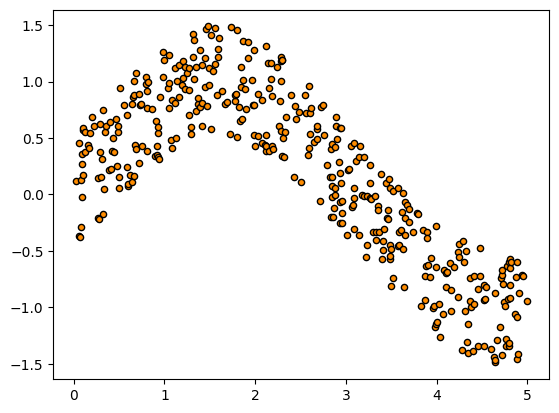

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

np.random.seed(0)
x = np.sort(5 * np.random.rand(400, 1), axis = 0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(x).ravel()

y[::1] += 1 * (0.5 - np.random.rand(400))
plt.scatter(x, y, s = 20, edgecolors = 'black', c = 'darkorange', label = 'data')


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 45) # 회귀문제에는 , stratify = y 쓰면 안됨

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(280, 1) (120, 1) (280,) (120,)


In [ ]:
regr_1 = DecisionTreeRegressor(max_depth = 2)
regr_2 = DecisionTreeRegressor(max_depth = 5)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_1 = regr_1.fit(x_train, y_train).predict(x_test)
y_2 = regr_2.fit(x_train, y_train).predict(x_test)

preds = [y_1, y_2]
weights = ['max_depth = 2', 'max_depth = 5']
evls = ['mse', 'mae', 'rmse', 'r2']
result = pd.DataFrame(index = weights, columns = evls)
for pred, weight in zip(preds, weights):
  mse = mean_squared_error(y_test, pred )
  mae = mean_absolute_error(y_test, pred)
  rmse = np.sqrt(mse)
  r_2 = r2_score(y_test, pred)

  result.loc[weight]['mse'] = round(mse, 2)
  result.loc[weight]['mae'] = round(mae, 2)
  result.loc[weight]['rmse'] = round(rmse, 2)
  result.loc[weight]['r2'] = round(r_2, 2)

result

,mse,mae,rmse,r2
max_depth = 2,0.13,0.3,0.36,0.77
max_depth = 5,0.12,0.28,0.35,0.79


Text(0.5, 0.98, 'Decision Tree Regression')

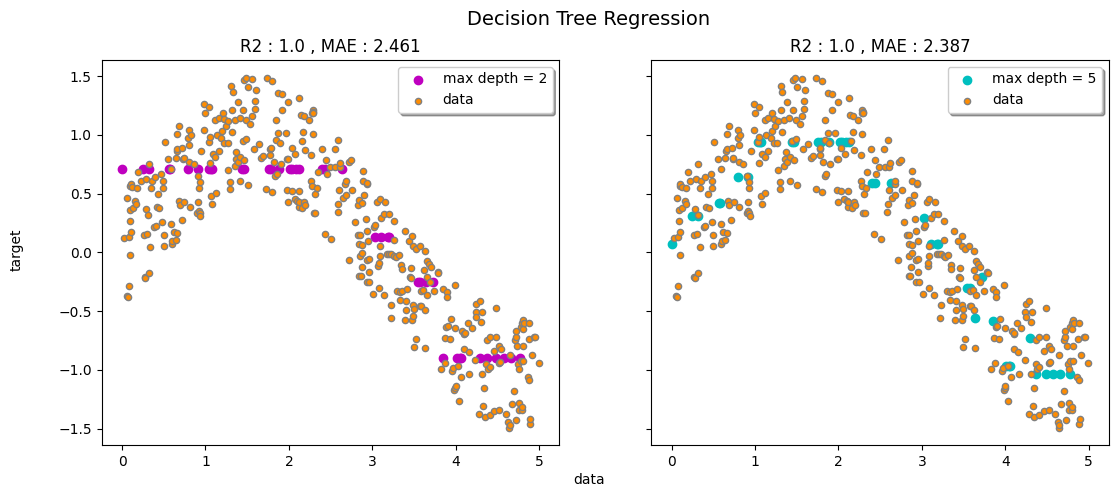

In [ ]:
x_test = np.sort(5 * np.random.rand(40, 1), axis = 0)

regrs = [regr_1, regr_2]
depth = ['max depth = 2', 'max depth = 5']
model_color = [ 'm', 'c']
fig, axes = plt.subplots(nrows = 1, ncols = 2, sharey = True, figsize = (13, 5))
for ix, regr in enumerate(regrs):
  pred = regr.fit(x,y).predict(x_test)
  r2 = regr.score(x_test, pred)
  mae = mean_absolute_error(x_test, pred)

  axes[ix].scatter(x_test, pred, color = model_color[ix], label = "{}".format(depth[ix]))
  axes[ix].scatter(x, y, s = 20, edgecolor = 'gray', c = 'darkorange', label = 'data')
  axes[ix].legend(loc = 'upper right', ncol = 1, fancybox = True, shadow = True)
  axes[ix].set_title('R2 : {r} , MAE : {m}'.format(r = round(r2, 3), m= round(mae, 3)))

fig.text(0.5, 0.04, 'data', ha = 'center', va = 'center')
fig.text(0.06, 0.5, 'target', ha = 'center', va = 'center', rotation = 'vertical')
fig.suptitle('Decision Tree Regression', fontsize = 14)
